<a href="https://colab.research.google.com/github/cmgospod/DS-Unit-1-Sprint-1-Dealing-With-Data/blob/master/module2-loadingdata/LS_DS_112_Loading_Data_Assignment.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Practice Loading Datasets

This assignment is purposely semi-open-ended you will be asked to load datasets both from github and also from CSV files from the [UC Irvine Machine Learning Repository](https://archive.ics.uci.edu/ml/index.php). 

Remember that the UCI datasets may not have a file type of `.csv` so it's important that you learn as much as you can about the dataset before you try and load it. See if you can look at the raw text of the file either locally, on github, using the `!curl` shell command, or in some other way before you try and read it in as a dataframe, this will help you catch what would otherwise be unforseen problems.


## 1) Load a dataset from Github (via its *RAW* URL)

Pick a dataset from the following repository and load it into Google Colab. Make sure that the headers are what you would expect and check to see if missing values have been encoded as NaN values:

<https://github.com/ryanleeallred/datasets>

In [0]:
import pandas as pd
spam_data = 'https://raw.githubusercontent.com/ryanleeallred/datasets/master/spam.csv'
df = pd.read_csv(spam_data, header=0, encoding = "ISO-8859-1", usecols = ['v1', 'v2'])
# This is a very simple dataset containing only text messages and their
# classification as either spam or not ("ham"). Some messages have non-Unicode
# characters, which requires the use of another encoding. In addition, each line
# ends with three commas, which results in extra columns which we can delete 
# with usecols
df.columns = ['Classification', 'Message']
# Changing the names of the columns for aesthetics and clarity
df.head()

,Classification,Message
0,ham,"Go until jurong point, crazy.. Available only ..."
1,ham,Ok lar... Joking wif u oni...
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...
3,ham,U dun say so early hor... U c already then say...
4,ham,"Nah I don't think he goes to usf, he lives aro..."


## 2) Load a dataset from your local machine
Download a dataset from the [UC Irvine Machine Learning Repository](https://archive.ics.uci.edu/ml/index.php) and then upload the file to Google Colab either using the files tab in the left-hand sidebar or by importing `files` from `google.colab` The following link will be a useful resource if you can't remember the syntax: <https://towardsdatascience.com/3-ways-to-load-csv-files-into-colab-7c14fcbdcb92>

While you are free to try and load any dataset from the UCI repository, I strongly suggest starting with one of the most popular datasets like those that are featured on the right-hand side of the home page. 

Some datasets on UCI will have challenges associated with importing them far beyond what we have exposed you to in class today, so if you run into a dataset that you don't know how to deal with, struggle with it for a little bit, but ultimately feel free to simply choose a different one. 

- Make sure that your file has correct headers, and the same number of rows and columns as is specified on the UCI page. If your dataset doesn't have headers use the parameters of the `read_csv` function to add them. Likewise make sure that missing values are encoded as `NaN`.

In [0]:
df2 = pd.read_csv('abalone.data', names = ['Sex', 'Length', 'Diameter', 'Height', 'Whole weight', 'Shucked weight', 'Viscera weight', 'Shell weight', 'Rings'])
# Names taken from abalone.names
df2.isna().sum()
# No missing values, as per abalone.names

Sex               0
Length            0
Diameter          0
Height            0
Whole weight      0
Shucked weight    0
Viscera weight    0
Shell weight      0
Rings             0
dtype: int64

In [0]:
df2.describe
# Same number of rows as the original dataset

<bound method NDFrame.describe of      Sex  Length  Diameter  ...  Viscera weight  Shell weight  Rings
0      M   0.455     0.365  ...          0.1010        0.1500     15
1      M   0.350     0.265  ...          0.0485        0.0700      7
2      F   0.530     0.420  ...          0.1415        0.2100      9
3      M   0.440     0.365  ...          0.1140        0.1550     10
4      I   0.330     0.255  ...          0.0395        0.0550      7
5      I   0.425     0.300  ...          0.0775        0.1200      8
6      F   0.530     0.415  ...          0.1415        0.3300     20
7      F   0.545     0.425  ...          0.1495        0.2600     16
8      M   0.475     0.370  ...          0.1125        0.1650      9
9      F   0.550     0.440  ...          0.1510        0.3200     19
10     F   0.525     0.380  ...          0.1475        0.2100     14
11     M   0.430     0.350  ...          0.0810        0.1350     10
12     M   0.490     0.380  ...          0.0950        0.1900     11


## 3) Load a dataset from UCI using `!wget`

"Shell Out" and try loading a file directly into your google colab's memory using the `!wget` command and then read it in with `read_csv`.

With this file we'll do a bit more to it.

- Read it in, fix any problems with the header as make sure missing values are encoded as `NaN`.
- Use the `.fillna()` method to fill any missing values. 
 - [.fillna() documentation](https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.fillna.html)
- Create one of each of the following plots using the Pandas plotting functionality:
 - Scatterplot
 - Histogram
 - Density Plot


In [0]:
!wget https://archive.ics.uci.edu/ml/machine-learning-databases/forest-fires/forestfires.csv

--2019-08-06 21:31:58--  https://archive.ics.uci.edu/ml/machine-learning-databases/forest-fires/forestfires.csv
Resolving archive.ics.uci.edu (archive.ics.uci.edu)... 128.195.10.252
Connecting to archive.ics.uci.edu (archive.ics.uci.edu)|128.195.10.252|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 25478 (25K) [application/x-httpd-php]
Saving to: ‘forestfires.csv.1’

forestfires.csv.1   100%[===================>]  24.88K  --.-KB/s    in 0.06s   

2019-08-06 21:31:59 (393 KB/s) - ‘forestfires.csv.1’ saved [25478/25478]



In [0]:
df3 = pd.read_csv('forestfires.csv')
df3.head()

,X,Y,month,day,FFMC,DMC,DC,ISI,temp,RH,wind,rain,area
0,7,5,mar,fri,86.2,26.2,94.3,5.1,8.2,51,6.7,0.0,0.0
1,7,4,oct,tue,90.6,35.4,669.1,6.7,18.0,33,0.9,0.0,0.0
2,7,4,oct,sat,90.6,43.7,686.9,6.7,14.6,33,1.3,0.0,0.0
3,8,6,mar,fri,91.7,33.3,77.5,9.0,8.3,97,4.0,0.2,0.0
4,8,6,mar,sun,89.3,51.3,102.2,9.6,11.4,99,1.8,0.0,0.0


In [0]:
df3.isnull().sum()
# No missing values to fill in. The last two variables have a lot of zero 
# values, but this is correct and not a placeholder for missing data.

X        0
Y        0
month    0
day      0
FFMC     0
DMC      0
DC       0
ISI      0
temp     0
RH       0
wind     0
rain     0
area     0
dtype: int64

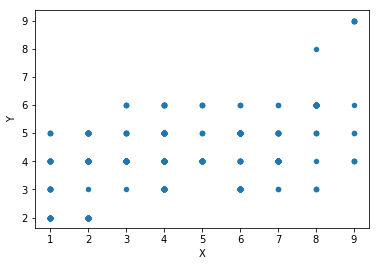

In [0]:
df3.plot.scatter('X','Y')
# This scatterplot is actually a map of forest fires in the area.

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7fad5ebf27b8>]],
      dtype=object)

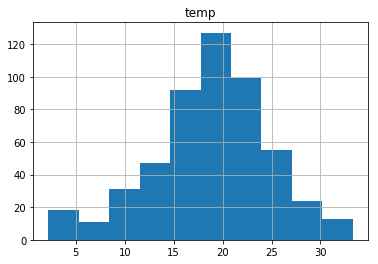

In [0]:
df3.hist('temp')
# Histogram of temperature. Looks like a normal distribution, more or less.

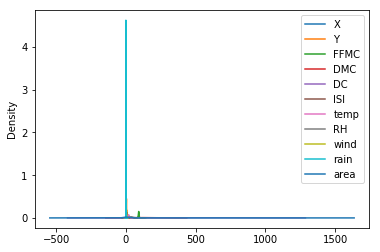

In [0]:
df3.plot.density()
# This plot is correct despite how weird it looks. Rain has an enormous density
# relative to all other variables in the dataset, which is why the plot looks 
# like this

In [0]:
# Since this didn't include any missing values, I'm going to import another file
# for practice
df4 = pd.read_csv('processed.cleveland.data', names = ['age', 'sex', 'cp', 'trestbps', 'chol', 'fbs', 'restecg', 'thalach', 'exang', 'oldpeak', 'slope', 'ca', 'thal', 'num'], na_values = ['?'])
df4.isna().sum()
# All of our null values are in two columns, ca and thal

age         0
sex         0
cp          0
trestbps    0
chol        0
fbs         0
restecg     0
thalach     0
exang       0
oldpeak     0
slope       0
ca          4
thal        2
num         0
dtype: int64

In [0]:
df4.thal.describe()

count    301.000000
mean       4.734219
std        1.939706
min        3.000000
25%        3.000000
50%        3.000000
75%        7.000000
max        7.000000
Name: thal, dtype: float64

In [0]:
df4.thal.mode()
# Thal is a discrete variable, so taking the mean is not a good idea. 3 is both
# the median and the mode, so let's go with that

0    3.0
dtype: float64

In [0]:
df4.thal.fillna(value=3, inplace=True)

In [0]:
df4.ca.describe()
# Again, the median seems like the best number to go with here. Zero it is.

count    299.000000
mean       0.672241
std        0.937438
min        0.000000
25%        0.000000
50%        0.000000
75%        1.000000
max        3.000000
Name: ca, dtype: float64

In [0]:
df4.ca.fillna(value=0, inplace=True)
df4.isna().sum()
# All missing values filled

age         0
sex         0
cp          0
trestbps    0
chol        0
fbs         0
restecg     0
thalach     0
exang       0
oldpeak     0
slope       0
ca          0
thal        0
num         0
dtype: int64

## Stretch Goals - Other types and sources of data

Not all data comes in a nice single file - for example, image classification involves handling lots of image files. You still will probably want labels for them, so you may have tabular data in addition to the image blobs - and the images may be reduced in resolution and even fit in a regular csv as a bunch of numbers.

If you're interested in natural language processing and analyzing text, that is another example where, while it can be put in a csv, you may end up loading much larger raw data and generating features that can then be thought of in a more standard tabular fashion.

Overall you will in the course of learning data science deal with loading data in a variety of ways. Another common way to get data is from a database - most modern applications are backed by one or more databases, which you can query to get data to analyze. We'll cover this more in our data engineering unit.

How does data get in the database? Most applications generate logs - text files with lots and lots of records of each use of the application. Databases are often populated based on these files, but in some situations you may directly analyze log files. The usual way to do this is with command line (Unix) tools - command lines are intimidating, so don't expect to learn them all at once, but depending on your interests it can be useful to practice.

One last major source of data is APIs: https://github.com/toddmotto/public-apis

API stands for Application Programming Interface, and while originally meant e.g. the way an application interfaced with the GUI or other aspects of an operating system, now it largely refers to online services that let you query and retrieve data. You can essentially think of most of them as "somebody else's database" - you have (usually limited) access.

*Stretch goal* - research one of the above extended forms of data/data loading. See if you can get a basic example working in a notebook. Image, text, or (public) APIs are probably more tractable - databases are interesting, but there aren't many publicly accessible and they require a great deal of setup.

In [0]:
import requests as rq
api = rq.get('https://official-joke-api.appspot.com/random_ten')
text = eval(api.text)
df6 = pd.DataFrame(text)
cols = ['setup', 'punchline', 'type', 'id']
df6 = df6[cols]
df6.head(10)

,setup,punchline,type,id
0,What do you call a fat psychic?,A four-chin teller.,general,217
1,What do you get when you cross a bee and a sheep?,A bah-humbug.,general,241
2,What do you call a boomerang that won't come b...,A stick.,general,204
3,How many bones are in the human hand?,A handful of them.,general,140
4,Why are fish so smart?,Because they live in schools!,general,313
5,Knock knock. \n Who's there? \n Opportunity.,That is impossible. Opportunity doesn’t come k...,knock-knock,34
6,What do you call a cow with no legs?,Ground beef.,general,207
7,Have you ever heard of a music group called Ce...,They mostly wrap.,general,111
8,What does a female snake use for support?,A co-Bra!,general,247
9,Can a kangaroo jump higher than the Empire Sta...,Of course. The Empire State Building can't jump.,general,82


In [0]:
import random
url='https://api.opendota.com/api/matches/'
matches = []
for _ in range(10):
  matches.append(random.randint(4890000000,4900000000))
#   Generate random numbers to serve as match IDs. TODO: find another way of
#   generating match IDs that will only result in actual matches.
match_data = []
for match in range(len(matches)):
  match_data.append(rq.get(url + str(matches[match-1])))
#   Makes a string to pull from the API
df7 = pd.DataFrame(match_data)
df7.head(10)
# I tried to get this working as a stretch goal. The intent is to generate 10 
# random matches of online competitive game Dota 2 and pull stats about them
# into a nice dataframe. However, the API spits out a dictionary too complex
# to deal with in a short matter of time (below). In addition, not all IDs point
# to an actual match. I'd like to come back and fix this program later.

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30,31,32,33,34,35,36,37,38,39,...,155,156,157,158,159,160,161,162,163,164,165,166,167,168,169,170,171,172,173,174,175,176,177,178,179,180,181,182,183,184,185,186,187,188,189,190,191,192,193,194
0,"b'{""error"":""Not Found""}'",None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,...,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None
1,"b'{""error"":""Not Found""}'",None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,...,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None
2,"b'{""match_id"":4892408804,""barracks_status_dire...","b'core"":18,""dire_team_id"":null,""draft_timings""...","b's"":10,""leagueid"":0,""lobby_type"":7,""match_seq...","b',""hero_id"":14,""team"":0,""order"":0},{""is_pick""...","b'er"":2},{""is_pick"":false,""hero_id"":99,""team"":...","b'_team_id"":null,""radiant_win"":true,""radiant_x...","b'256,""tower_status_radiant"":2047,""version"":nu...","b'2408804,""player_slot"":0,""ability_targets"":nu...","b'84,5583,5582,6884,5582,5584,6885],""ability_u...","b'""backpack_0"":77,""backpack_1"":0,""backpack_2"":...","b'l,""damage"":null,""damage_inflictor"":null,""dam...","b'enies"":8,""dn_t"":null,""firstblood_claimed"":nu...","b'll,""hero_damage"":26127,""hero_healing"":125,""h...","b'_4"":108,""item_5"":259,""item_uses"":null,""kill_...","b'null,""last_hits"":102,""leaver_status"":0,""leve...","b'l,""obs_left_log"":null,""obs_log"":null,""obs_pl...","b'{""permanent_buff"":6,""stack_count"":1}],""pings...","b'd"":null,""roshans_killed"":null,""rune_pickups""...","b'en_placed"":null,""stuns"":null,""teamfight_part...","b'02,""xp_reasons"":null,""xp_t"":null,""personanam...","b'1,""duration"":1566,""cluster"":133,""lobby_type""...","b'"":1,""lose"":0,""total_gold"":15268,""total_xp"":1...","b'cs"":[],""benchmarks"":{""gold_per_min"":{""raw"":5...","b's_per_min"":{""raw"":0.6513409961685824,""pct"":0...","b'7747},""hero_damage_per_min"":{""raw"":1001.0344...","b'""pct"":0.9196102314250914},""tower_damage"":{""r...","b'9},""lhten"":{}}},{""match_id"":4892408804,""play...","b'022,5019,5021,5021,5918,5019,5022,5632,5632,...","b'assists"":7,""backpack_0"":0,""backpack_1"":0,""ba...","b'acked"":null,""damage"":null,""damage_inflictor""...","b'aths"":1,""denies"":11,""dn_t"":null,""firstblood_...","b'gold_t"":null,""hero_damage"":8619,""hero_healin...","b'tem_4"":236,""item_5"":0,""item_uses"":null,""kill...","b'null,""last_hits"":95,""leaver_status"":0,""level...","b',""obs_left_log"":null,""obs_log"":null,""obs_pla...","b'""permanent_buff"":6,""stack_count"":1}],""pings""...","b'"":null,""roshans_killed"":null,""rune_pickups"":...","b'n_placed"":null,""stuns"":null,""teamfight_parti...","b'8,""xp_reasons"":null,""xp_t"":null,""radiant_win...","b'de"":22,""is_contributor"":false,""patch"":41,""re...",...,"b'tuns_per_min"":{""raw"":0,""pct"":0.0003085467448...","b'""ability_upgrades_arr"":[5131,5132,5131,5130,...","b'count_id"":144372759,""actions"":null,""addition...","b'"":null,""camps_stacked"":null,""connection_log""...","b'received"":null,""damage_taken"":null,""damage_t...","b',""gold_per_min"":332,""gold_reasons"":null,""gol...","b'ero_id"":21,""item_0"":50,""item_1"":77,""item_2"":...","b':null,""killed_by"":null,""kills"":5,""kills_log""...","b'state"":null,""max_hero_hit"":null,""multi_kills...","b'""party_size"":1,""performance_others"":null,""pe...","b'l,""r

{
  "match_id": 0,
  "barracks_status_dire": 0,
  "barracks_status_radiant": 0,
  "chat": [
    {
      "time": 0,
      "unit": "string",
      "key": "string",
      "slot": 0,
      "player_slot": 0
    }
  ],
  "cluster": 0,
  "cosmetics": {},
  "dire_score": 0,
  "draft_timings": [
    {
      "order": 0,
      "pick": true,
      "active_team": 0,
      "hero_id": 0,
      "player_slot": 0,
      "extra_time": 0,
      "total_time_taken": 0
    }
  ],
  "duration": 0,
  "engine": 0,
  "first_blood_time": 0,
  "game_mode": 0,
  "human_players": 0,
  "leagueid": 0,
  "lobby_type": 0,
  "match_seq_num": 0,
  "negative_votes": 0,
  "objectives": {},
  "picks_bans": {},
  "positive_votes": 0,
  "radiant_gold_adv": {},
  "radiant_score": 0,
  "radiant_win": true,
  "radiant_xp_adv": {},
  "start_time": 0,
  "teamfights": {},
  "tower_status_dire": 0,
  "tower_status_radiant": 0,
  "version": 0,
  "replay_salt": 0,
  "series_id": 0,
  "series_type": 0,
  "radiant_team": {},
  "dire_team": {},
  "league": {},
  "skill": 0,
  "players": [
    {
      "match_id": 0,
      "player_slot": 0,
      "ability_upgrades_arr": [
        0
      ],
      "ability_uses": {},
      "ability_targets": {},
      "damage_targets": {},
      "account_id": 0,
      "actions": {},
      "additional_units": {},
      "assists": 0,
      "backpack_0": 0,
      "backpack_1": 0,
      "backpack_2": 0,
      "buyback_log": [
        {
          "time": 0,
          "slot": 0,
          "player_slot": 0
        }
      ],
      "camps_stacked": 0,
      "connection_log": [
        {
          "time": 0,
          "event": "string",
          "player_slot": 0
        }
      ],
      "creeps_stacked": 0,
      "damage": {},
      "damage_inflictor": {},
      "damage_inflictor_received": {},
      "damage_taken": {},
      "deaths": 0,
      "denies": 0,
      "dn_t": [
        0
      ],
      "gold": 0,
      "gold_per_min": 0,
      "gold_reasons": {},
      "gold_spent": 0,
      "gold_t": [
        0
      ],
      "hero_damage": 0,
      "hero_healing": 0,
      "hero_hits": {},
      "hero_id": 0,
      "item_0": 0,
      "item_1": 0,
      "item_2": 0,
      "item_3": 0,
      "item_4": 0,
      "item_5": 0,
      "item_uses": {},
      "kill_streaks": {},
      "killed": {},
      "killed_by": {},
      "kills": 0,
      "kills_log": [
        {
          "time": 0,
          "key": "string"
        }
      ],
      "lane_pos": {},
      "last_hits": 0,
      "leaver_status": 0,
      "level": 0,
      "lh_t": [
        0
      ],
      "life_state": {},
      "max_hero_hit": {},
      "multi_kills": {},
      "obs": {},
      "obs_left_log": [
        {}
      ],
      "obs_log": [
        {}
      ],
      "obs_placed": 0,
      "party_id": 0,
      "permanent_buffs": [
        {}
      ],
      "pings": 0,
      "purchase": {},
      "purchase_log": [
        {
          "time": 0,
          "key": "string"
        }
      ],
      "rune_pickups": 0,
      "runes": {
        "property1": 0,
        "property2": 0
      },
      "runes_log": [
        {
          "time": 0,
          "key": 0
        }
      ],
      "sen": {},
      "sen_left_log": [
        {}
      ],
      "sen_log": [
        {}
      ],
      "sen_placed": 0,
      "stuns": 0,
      "times": [
        0
      ],
      "tower_damage": 0,
      "xp_per_min": 0,
      "xp_reasons": {},
      "xp_t": [
        0
      ],
      "personaname": "string",
      "name": "string",
      "last_login": null,
      "radiant_win": true,
      "start_time": 0,
      "duration": 0,
      "cluster": 0,
      "lobby_type": 0,
      "game_mode": 0,
      "patch": 0,
      "region": 0,
      "isRadiant": true,
      "win": 0,
      "lose": 0,
      "total_gold": 0,
      "total_xp": 0,
      "kills_per_min": 0,
      "kda": 0,
      "abandons": 0,
      "neutral_kills": 0,
      "tower_kills": 0,
      "courier_kills": 0,
      "lane_kills": 0,
      "hero_kills": 0,
      "observer_kills": 0,
      "sentry_kills": 0,
      "roshan_kills": 0,
      "necronomicon_kills": 0,
      "ancient_kills": 0,
      "buyback_count": 0,
      "observer_uses": 0,
      "sentry_uses": 0,
      "lane_efficiency": 0,
      "lane_efficiency_pct": 0,
      "lane": 0,
      "lane_role": 0,
      "is_roaming": true,
      "purchase_time": {},
      "first_purchase_time": {},
      "item_win": {},
      "item_usage": {},
      "purchase_tpscroll": {},
      "actions_per_min": 0,
      "life_state_dead": 0,
      "rank_tier": 0,
      "cosmetics": [
        0
      ],
      "benchmarks": {}
    }
  ],
  "patch": 0,
  "region": 0,
  "all_word_counts": {},
  "my_word_counts": {},
  "throw": 0,
  "comeback": 0,
  "loss": 0,
  "win": 0,
  "replay_url": "string"
}